In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("datasets_14872_228180_Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


<AxesSubplot:>

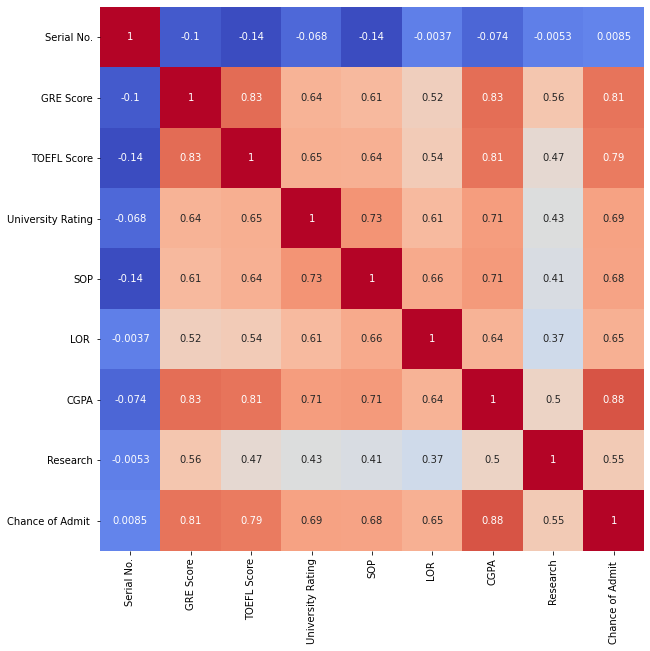

In [4]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(method="pearson"),annot=True,fmt ='.2g',square=True,cmap='coolwarm',cbar=False,ax=ax)

In [5]:
def impute_TANCET(cols):
    cgpa=cols[0]
    return(int(8.8*cgpa))
def impute_GATE(cols):
    GATE=cols[0]
    return(int((GATE-2.56)*10))

In [6]:
df['Tancet'] = df[["CGPA"]].apply(impute_TANCET,axis=1)
df['GATE']   = df[["CGPA"]].apply(impute_GATE,axis=1)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97
Tancet,500.0,75.03200,5.344540,59.00,71.0000,75.00,79.00,87.00


In [8]:
df = df[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Tancet','GATE','Chance of Admit ']]

In [9]:
df.to_csv("University_dataset.csv",index=False)

In [10]:
# # train test split
# X=df.iloc[:,1:7].values
# y=df.iloc[:,7:8].values

In [11]:
X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Tancet','GATE']]
y = df[['Chance of Admit ']]

In [12]:
X


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Tancet,GATE
0,337,118,4,4.5,4.5,9.65,1,84,70
1,324,107,4,4.0,4.5,8.87,1,78,63
2,316,104,3,3.0,3.5,8.00,1,70,54
3,322,110,3,3.5,2.5,8.67,1,76,61
4,314,103,2,2.0,3.0,8.21,0,72,56
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,79,64
496,337,117,5,5.0,5.0,9.87,1,86,73
497,330,120,5,4.5,5.0,9.56,1,84,70
498,312,103,4,4.0,5.0,8.43,0,74,58


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [15]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
y_predict=regressor.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_predict) 

0.004274138176893162

In [18]:
import pickle
model=open("Admission_predict.pkl","wb")
pickle.dump(regressor,model)
model.close()